In [30]:
from O.interface import *

In [ ]:
"""
## ##

the same as the other notebook but using less FF evaluations

this is only relevant for an expensive FF (u_), where training is usually on a small amount of data (r).

## ##

    When training on small amount of data, model during training is mostly not good, except at the region
    where the model minimises validation error.
    The region of lowest validation error is the only regions where the model is evaluated here.
    n_selective_evalautions is the number of random validation batches that are used in that region to solve BAR (raw).
    The forecefield is evalauted at the end, and separately from training, to complete the pymbar inputs.
    The final FE is averaged from n_selective_evalautions number of (raw) estimates.
    
This setup can be ran with any r, b0, u, u_ directly from the notebook without adjustments to any .py files, this is shown below:
These steps can be made into a tidy wrapped of personal preference.

 1) initialise nn object with training = False
nn = NN_interface_sc_multimap_selective_evaluation(
                name = 'veliparib_I_111_trying_small_dataset_selective_evall',
                paths_datasets = [12345],
                running_in_notebook = True,
                training = False,
                model_class = PGMcrys_v1,
)
self = nn.nns[0]

# 2) add all the necessary arrays and potential energy function(s) into the nn object (loop k if needed for each self = nn.nns[k])

# they are here, but can come from anywhere else:
sc = SingleComponent.initialise_from_save_('./O/MM/GAFF_sc/veliparib/data/veliparib_dataset_I_NVT_cell_111_CUT')
r = sc.xyz.astype(np.float32)
b = sc.boxes.astype(np.float32)
b0 = b[-1] ; assert np.abs(b[0] - b0).max() < 0.0000001
u = np.array(sc.u) ; assert len(r) == len(u)
u_ = sc.u_

class dummy:
    def __init__(self,):
        self._single_mol_pdb_file_ = sc._single_mol_pdb_file_

''' this is all that is needed:
r  : (n_frames, N, 3) in nm
u  : (n_frames, 1)    in kT
b0 : (3,3)            in nm
u_ : potential energy function in kT (such that u_(r) = u)
any object with single molecule PDB inside it # Angstroms
'''

# mimicking the simple thing import_MD_dataset_ does internally, but from here:
self.r = r
self.b0 = b0
self.u = u
self.u_mean = u.mean()
self.n_training = int(self.u.shape[0]*self.fraction_training)
self.u_ = u_ 
self.sc = dummy()

# 3) set nn.training = True 
self.training = nn.training = True

# 4) continue with *(the rest of the steps) as in this notebook.

""";

In [4]:
nn = NN_interface_sc_multimap_selective_evaluation(
                name = 'veliparib_I_111_trying_small_dataset_selective_eval',
                paths_datasets = ['./O/MM/GAFF_sc/veliparib/data/veliparib_dataset_I_NVT_cell_111_CUT',],
                running_in_notebook = True,
                training = True,
                model_class = PGMcrys_v1,
)

# initialise_object (SingleComponent) with GAFF FF, from the input file (PDB):
 ./O//MM/GAFF_sc/veliparib/veliparib_I_equilibrated_cell_111.pdb
n_molecules: 8

# initialise_system:
set PME cutoff to: 0.36 nm
removeCMMotion active: True

__ changing n_mol in top: ________________________________
in the /mnt/c/Users/User/Desktop/FEcrys/O/MM/GAFF_sc/veliparib/misc/x_veliparib_gmx.top
replaced 1 line ( 399 ) 
 from: 
     UNK                  1
 to 
     UNK                  8
these changes were written into file: /mnt/c/Users/User/Desktop/FEcrys/O/MM/GAFF_sc/veliparib/misc/x_x_veliparib_gmx.top
__________________________________________________________

set SwitchingFunction to 0.95 * PME_cutoff = 0.34199999999999997 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  8, n_atoms_mol = 34, N = 272, n_DOF = 813 (n_constraints = 3) 

# initialise_simulation:
set temperature: 300 Kelvin
set integration timestep: 0.002 ps
set collision rate (friction ce

In [ ]:
# (the rest of the steps):

In [5]:
nn.set_ic_map_step1(ind_root_atom=5, option=0)
nn.set_ic_map_step2(check_PES=True)
nn.set_ic_map_step3(n_mol_unitcells=[8,])
nn.set_model(n_layers = 4, learning_rate=0.001, n_att_heads=4,
             evaluation_batch_size=5000)

molecule with 34 atoms, of which 18 are heavy atoms, and the rest are 16 hydrogens.
atoms with incides [5, 10, 1] are set to be the Cartesian_Block
position of the molecule specified by atoms with index: 5
rotation of the molecule specified by atoms with indices: [10, 1]
conformation of the molecule specified by all other atoms.
COM removed from data without taking into account PBC of the box
inds_rand attempt: 1
! not found
inds_rand attempt: 2
! not found
inds_rand attempt: 3
! not found
inds_rand attempt: 4
! not found
inds_rand attempt: 5
! not found
inds_rand attempt: 6
found !
checking that PES matches the sampled dataset:
errT: 2.5822637561475403e-05 -0.0036737386690219864 0.0034337032478788387
errV: -3.9390665217268863e-05 -0.004138748969751305 0.003740569297235652
initialising on 60000 datapoints provided
SCmap.initalise_ : a single box provided -> Cartesian transformed by SCmap.
3 out of 248 potentially periodic marginal variables are set to periodic
This topology is shared o

In [6]:
nn.set_trainer(n_batches_between_evaluations=50)

'43.76 999 999 19 AVMD_T:[358.41722654] AVMD_V:[353.7077048054242] || FE:[0.0] SD:[0.0]'

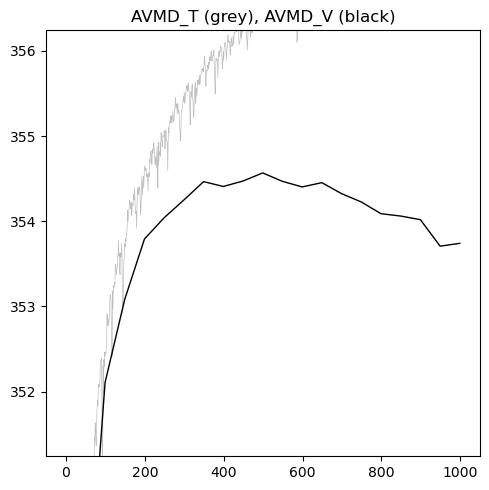

training time so far: 43.94 minutes
saved ./O//NN/training_results/misc/veliparib_I_111_trying_small_dataset_selective_eval_SC__misc_
misc training outputs were saved


In [8]:
nn.train(   n_batches = 1000,
            f_halfwindow_visualisation = [2.5, 1.],
        )

In [ ]:
# this is also a cpu run
# not sure why the training time is longer than in the first notebook, while doing less computations overall.
# the installations on this laptop changed since the last time.
# maybe saving of 5000 supercell coordinates every 50 batches makes everything slower; this part is necessary here.

In [9]:
nn.load_misc_()

# 5 * 5000 FF evalautions:

In [10]:
nn.solve_BAR_using_pymbar_(n_selective_evalautions=5)


two-state BAR evaluation in macrostate 0:
evalaution batch 9: evaluating potential energies on model samples. The estimate will be saved.



******* JAX 64-bit mode is now on! *******
*     JAX is now set to 64-bit mode!     *
*   This MAY cause problems with other   *
*      uses of JAX in the same code.     *
******************************************

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


evalaution batch 8: evaluating potential energies on model samples. The estimate will be saved.
evalaution batch 10: evaluating potential energies on model samples. The estimate will be saved.
evalaution batch 6: evaluating potential energies on model samples. The estimate will be saved.
evalaution batch 12: evaluating potential energies on model samples. The estimate will be saved.
saved ./O//NN/training_results/BAR/veliparib_I_111_trying_small_dataset_selective_eval_SC__BAR__BAR_output_crystal_index=0
saved BAR result


rough grid search estimate: 0.0  +/- standard deviation = 0.0 
     pymbar final estimate: 357.7243028557652 +/- standard error     = 0.09071459992765372


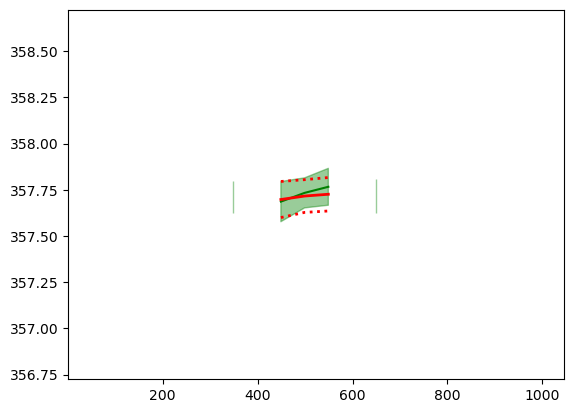

In [11]:
nn.plot_result_(n_mol=8)

# 10 * 5000 FF evalautions:

In [12]:
nn.solve_BAR_using_pymbar_(n_selective_evalautions=10)

found saved BAR result
rerun = True

two-state BAR evaluation in macrostate 0:
evalaution batch 7: evaluating potential energies on model samples. The estimate will be saved.
evalaution batch 11: evaluating potential energies on model samples. The estimate will be saved.
evalaution batch 13: evaluating potential energies on model samples. The estimate will be saved.
evalaution batch 5: evaluating potential energies on model samples. The estimate will be saved.
evalaution batch 14: evaluating potential energies on model samples. The estimate will be saved.
saved ./O//NN/training_results/BAR/veliparib_I_111_trying_small_dataset_selective_eval_SC__BAR__BAR_output_crystal_index=0
saved BAR result


rough grid search estimate: 0.0  +/- standard deviation = 0.0 
     pymbar final estimate: 357.72207252163054 +/- standard error     = 0.09729542840390984


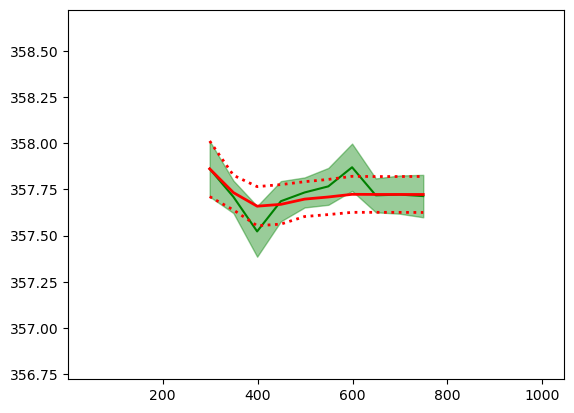

In [14]:
nn.plot_result_(n_mol=8)

In [ ]:
# the only energies that were evaluated (10 lines: 10 batches, each batch 5000 samples from the model):

In [10]:
nn.load_energies_during_training_()

V estimate0skipped
V estimate1skipped
V estimate2skipped
V estimate3skipped
V estimate4skipped
V estimate15skipped
V estimate16skipped
V estimate17skipped
V estimate18skipped
V estimate19skipped
T estimate19skipped

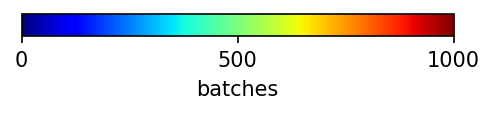

(-338.72615681944717, -38.7261568194472)

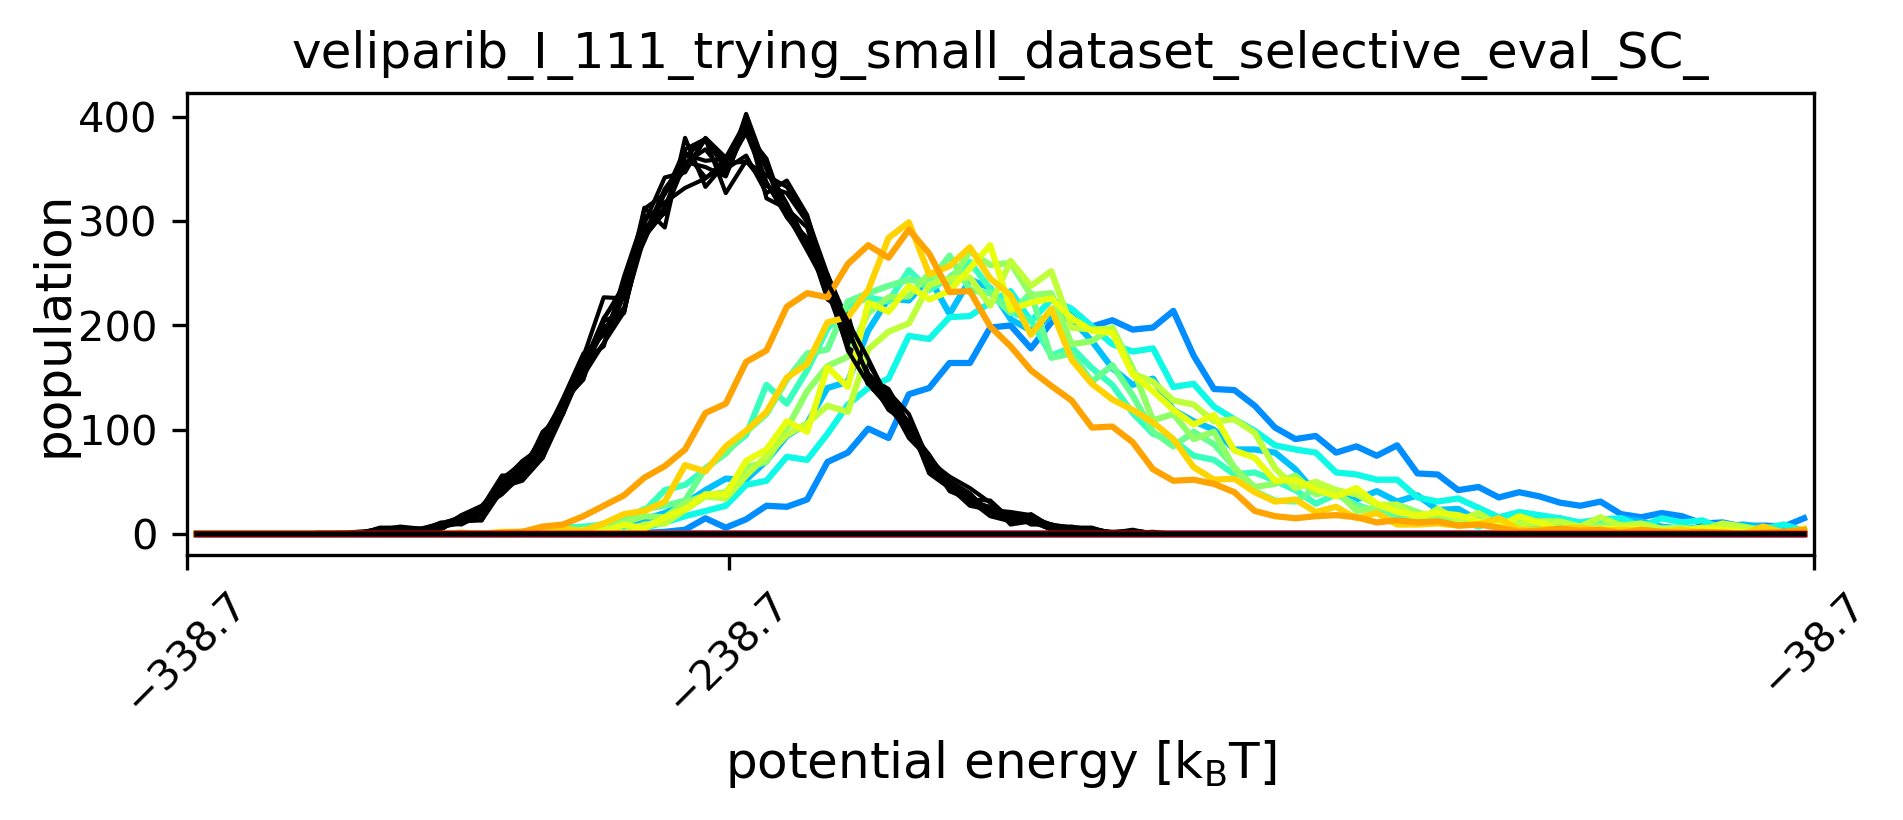

In [29]:
_range = [nn.nns[0].u_mean-100, nn.nns[0].u_mean+200]
nn.plot_energies_during_training_(0, _range=_range)
plt.xlim(*_range)